In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-06-06 18:48:44.140164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 18:48:44.711413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Define the LeNet model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2024-06-06 18:49:25.881529: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1559/1563 [============================>.] - ETA: 0s - loss: 1.6884 - accuracy: 0.3852

2024-06-06 18:49:38.275205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 13s 8ms/step - loss: 1.6881 - accuracy: 0.3853 - val_loss: 1.5339 - val_accuracy: 0.4364
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4328 - accuracy: 0.4833 - val_loss: 1.3603 - val_accuracy: 0.5125
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3237 - accuracy: 0.5270 - val_loss: 1.2720 - val_accuracy: 0.5432
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2405 - accuracy: 0.5597 - val_loss: 1.2455 - val_accuracy: 0.5537
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1801 - accuracy: 0.5813 - val_loss: 1.2171 - val_accuracy: 0.5668
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1252 - accuracy: 0.5999 - val_loss: 1.1478 - val_accuracy: 0.5913
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0668 - accuracy: 0.6196 - val_loss: 1.1305 - val_accuracy: 0.5

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

2024-06-06 18:51:15.108663: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - loss: 1.0892 - accuracy: 0.6183 - 793ms/epoch - 3ms/step

Test accuracy: 0.6183000206947327


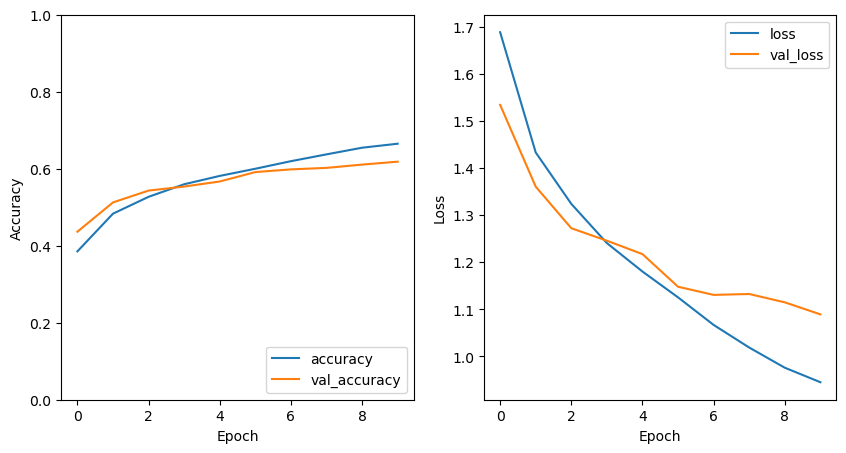

In [7]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()